# Module II: The hydrogen atom and molecule ion

Comments can be sent to: Trond S. Ingebrigtsen, trond@ruc.dk. Visit this [link](http://trondingebrigtsen.com) for more Jupyter modules. 

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import sph_harm, assoc_laguerre
from scipy.integrate import dblquad, tplquad 

from matplotlib import rc, cm, colors
rc('animation', html='jshtml')

import warnings
warnings.filterwarnings("ignore")

This notebook studies the hydrogen atom (Chapter 4 in Griffiths) and the hydrogen molecule ion (J-P Grivet, J. Chem. Educ. **79**, 127 (2002)). After this module you will understand:

    1. The stationary states of the hydrogen atom and their visualization.
    2. Real wave functions for the hydrogen atom.
    3. The hydrogen molecule ion and the LCAO approach to molecular wave functions (orbitals).
    
The module is intended for about **4 hours** of work. You will need to hand it in **next week**. 

# 1. The hydrogen atom

This section will enable you to visualize the stationary states of the hydrogen atom given by

\begin{align}
  \psi_{nlm} = R_{nl}(r)Y_{lm}(\theta, \phi),
\end{align}

where $n = 1, ..., \infty$, $l = 0, ..., n-1$, and $-l \leq m \leq l$. These solutions are often called atomic orbitals (one-electron wave functions) and are, in general, complex functions. The spherical harmonics $Y_{lm}$ only contain the dependence on $\phi$ in the $e^{-i \phi m}$ factor, and the probability density $|\psi_{nlm}|^{2}$ is therefore a function only of $r$ and $\theta$. Do you see why? 

There are different ways to visualizing these wave functions. One way is to plot level or contour sets. These sets 
are values of constant probability density and will be surfaces in the ($x$,$y$,$z$)-space. Since the probability density is not a function of $\phi$ we can simply plot the contours in, e.g., the ($x$,$z$)-plane as any other plane containing the $z$-axis will be the same. Mentally one should then rotate these images around the $z$-axis.
<br><br>

**How to proceed with this module:**

You will need to insert your own Python code in front of the sentence: **"??? Implement me ???"**. Throughout the code you will also encounter **"Exercise X"** which indicates a modification related to Exercise X of the same section. You are **expected** to document your reasoning/thoughts and findings in each section. Enjoy!

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


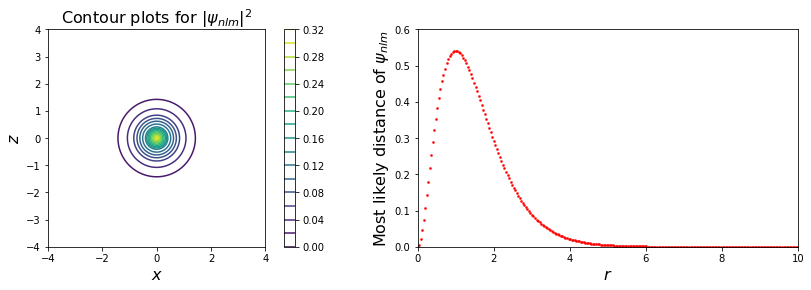

In [3]:
# Quantum numbers n, l, m, and the Bohr radius a in Hartree units.
n, l, m, a = 1, 0, 0, 1 # Exercise 1.

# Implementation of the hydrogen atom stationary states.
# phi goes from 0 to 2pi and theta is from 0 to pi. See textbook.
def stationary_state(n,l,m,r,phi,theta,t):
    # Energy in Hartree units.
    En = -0.5 / n**2 # ??? Implement me ???

    # Use the 3rd edition for finding the normalization constant.
    A = math.sqrt((2/(n*a))**3 * math.factorial(n-l-1) / ((2*n)*math.factorial(n+l))) # ??? Implement me ???

    # Verify this expression before moving on. See textbook. 
    R_nl = A * np.exp(-r/(n*a)) * (2*r / (n*a))**l * assoc_laguerre(2*r / (n*a),n-l-1,2*l+1)
    Y_lm = sph_harm(m,l,phi,theta)

    return R_nl * Y_lm * np.exp(-1j*En*t) 

#################################################################################

# Plotting the orbitals.
fig = plt.figure(figsize=(15,4))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_xlabel(r'$x$', fontsize=16, fontname="Arial") 
ax1.set_ylabel(r'$z$', fontsize=16, fontname="Arial")
ax1.set_title(r'Contour plots for $|\psi_{nlm}|^{2}$', fontsize=16) 
ax1.set_aspect("equal")
ax1.set_xlim(-4, 4) # Change scale of figure here.
ax1.set_ylim(-4, 4)

ax2.set_xlabel(r'$r$', fontsize=16, fontname="Arial") 
ax2.set_ylabel(r'Most likely distance of $\psi_{nlm}$', fontsize=16, fontname="Arial")
ax2.set_xlim(0, 10) 
ax2.set_ylim(0, 0.6)

# Test if the wave function is normalized correctly. 
I = tplquad(lambda theta, phi, r: r**2 * np.sin(theta) *
            np.abs(stationary_state(n,l,m,r,phi,theta,0))**2,
            0, 100,
            lambda phi: 0,  lambda phi: 2*np.pi,
            lambda phi, theta: 0, lambda phi, theta: np.pi)

if(math.isclose(I[0],1) != True):
  print("The normalization constant is not correct! Try again.")

# Plot contour plots of the probability density.
r = np.linspace(0, 20)
phi = 0
# We let theta run negative to cover the full plane.
theta = np.linspace(-math.pi+0.0001, math.pi-0.0001, 200)
R, Theta = np.meshgrid(r, theta)

# Convert to Cartesian coordinates.
X = R * np.sin(Theta) * np.cos(phi)
Y = R * np.sin(Theta) * np.sin(phi)
Z = R * np.cos(Theta)

# The probability density. Note Y = 0.
P = np.abs(stationary_state(n,l,m,R,phi,Theta,0))**2
cset = ax1.contour(X, Z, P, 20)
fig.colorbar(cset, ax=ax1)

# Exercise 2.
# Hint: Replace 0 with an equation from the textbook. r**2 is added later in the code. 
# NB: lambda defines a function without name in Python (see Python manual).
partial_integral = lambda r: dblquad(lambda theta, phi: np.sin(theta) * np.abs(stationary_state(n,l,m,r,phi,theta,0))**2, # Exercise 2. Replace 0 with the right version. 
                    0, 2*np.pi,
                    lambda theta: 0, lambda theta: np.pi) 

# Loop over all r values.
r_values = np.linspace(0,20,500)
avg_plot = np.zeros(500)
for i in range(0,len(r_values)):
  avg_plot[i] = r_values[i]**2 * partial_integral(r_values[i])[0]

values = ax2.scatter(r_values,avg_plot,marker='o',s=5,linewidths=0.3,color='red')

The left figure shows a contour plot for $|\psi_{nlm}|^{2}$ in the ($x$,$z$)-plane and the right figure shows the most likely distance of a specific stationary state. Before implementation it shows always the value 0.

**Exercise 1:** Explain to your partner what a contour plot for the probability density is. Look at the contour plots for $n = 1, 2$, $l = 0, ..., n - 1$ and $-l \leq m \leq l$. Describe the plots; what does the shape mean physically for the electron in each orbital? 

**Exercise 2:** What is the most likely distance for the electron in the previous states? If you find that it is right on top of the proton go directly to jail as Griffiths would say. You will have to insert an expression in the lambda-function using an equation from the textbook.

**Exercise 3:** *This is a pen and paper exercise*. According to Problem 2.1(b), the stationary states can always be taken to be real. For $n$ = 2 and $l = 1$ we have two complex and 1 real solutions (do you see why?). Create the new real solutions by a linear combination of the complex solutions $\psi_{211}$ and $\psi_{21-1}$. Are your new basis functions, eigenfunctions for $\hat{L}_{z}$?

# 2. The hydrogen molecule ion

The simplest possible molecule is the $H_{2}^{+}$ ion which occurs naturally, e.g., in space. It has the Hamiltonian (confirm it!)

\begin{align}
\hat{H} = -\frac{1}{2}\nabla^{2}_{e} -\frac{1}{2}\nabla^{2}_{A} -\frac{1}{2}\nabla^{2}_{B} - \frac{1}{r_{A}} - \frac{1}{r_{B}} + \frac{1}{R_{AB}},
\end{align}

where $R_{AB}$ is nuclei-nuclei distance. To solve the molecular SE we need to apply first an approximation called the abdiabatic Born-Oppenheimer approximation. We will not go deeply into this approximation in this course, but it corresponds to assuming that the molecular wave function can be written as the product of a function *only* of the electronic coordinates, with fixed nuclei coordinates, and a function *only* of the atomic positions. The electronic wave function is a solution to

\begin{align}
\hat{H}_{e} = -\frac{1}{2}\nabla^{2}_{e} - \frac{1}{r_{A}} - \frac{1}{r_{B}} + \frac{1}{R_{AB}}.
\end{align}

This electronic SE can be solved analytically for $H_{2}^{+}$ but it is a rather long and mathematical intensive 
task (Ø. Burrau, 1927 - a Dane!). It turns out that linear combinations of the atomic orbitals (LCAO) are resonable approximations to the obtained solutions and can also be used for more complicated molecules. The first two lowest-energy molecular orbitals are hence described by the $1s$ combinations:

\begin{align}
\psi_{\sigma_{g}}(\textbf{r}) & = \psi^{A}_{1s}(\textbf{r}) + \psi^{B}_{1s}(\textbf{r}),\\
\psi_{\sigma_{u}}(\textbf{r}) & = \psi^{A}_{1s}(\textbf{r}) - \psi^{B}_{1s}(\textbf{r}), 
\end{align}

where the superscript refers to the location of the wave functions and the subscript indicates whether the function is even or odd. We will now visualize these two molecular orbitals.

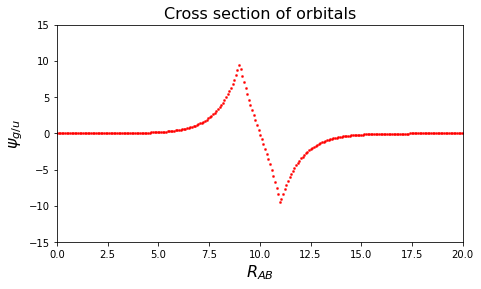

In [ ]:
# The numbers should be symmetric around 10. Exercise 2.
nucleiA = 9.0
nucleiB = 11.0

# Piecewise molecular wave function. 
def LCAO(n,r_values):
    avg_plot = np.zeros(len(r_values))
    
    partial_integral = lambda r: dblquad(lambda theta, phi: 
                        stationary_state(n,0,0,r,phi,theta,0), 
                        0, 2*np.pi,
                        lambda theta: 0, lambda theta: np.pi)
    
    for i in range(0,len(r_values)):
    
        # Change - to + for the different functions. Exercise 1.
        if(r_values[i] < nucleiA): 
            avg_plot[i] = partial_integral(nucleiA-r_values[i])[0] - partial_integral(nucleiB-r_values[i])[0]
    
        if(r_values[i] > nucleiA and r_values[i] < nucleiB):
            avg_plot[i] = partial_integral(r_values[i]-nucleiA)[0] - partial_integral(nucleiB-r_values[i])[0]
    
        if(r_values[i] > nucleiB):
            avg_plot[i] = partial_integral(r_values[i]-nucleiA)[0] - partial_integral(r_values[i]-nucleiB)[0]
    
    return avg_plot
 
# Plot the figures.
fig1 = plt.figure(figsize=(16,4))
fig1.tight_layout(rect=[0, 0.03, 1, 0.95])

ax3 = fig1.add_subplot(1, 2, 1)
ax3.set_xlabel(r'$R_{AB}$', fontsize=16, fontname="Arial") 
ax3.set_ylabel(r'$\psi_{g/u}$', fontsize=16, fontname="Arial")
ax3.set_title(r'Cross section of orbitals', fontsize=16) 
ax3.set_xlim(0, 20)  
ax3.set_ylim(-15, 15) # Change scale here. 

r_values = np.linspace(0,40,500)
avg_plot = LCAO(1,r_values)

values = ax3.scatter(r_values,avg_plot,marker='o',s=5,linewidths=0.3,color='red')

**Exercise 1:** Discuss with your partner what the shape of the first two molecular orbitals tell you about the stability of the molecule by plotting them (see Exercise 1 in the code). How would you create the higher energy orbitals in the LCAO method?

**Exercise 2:** What happens as the nuclei are moved away from each other? When will the linear combinations become  exact solutions?

**Exercise 3:** *This is a pen and paper exercise*. Using the results of the above two exercises make a drawing (inserting a hand-drawn graph is fine) of the orbital energy $E$ as a function of nuclei distance $R_{AB}$. Think about the limiting values $R_{AB} \to \infty$ and $R_{AB} \to 0$ (recall Problem 4.19). 

# 3. Module completed

Congratulations! You will need to save the module and hand it in **next week**. Future suggestions for this module can also be written here.